<a href="https://colab.research.google.com/github/Dexne/Pattern_Recognition/blob/main/03_explicaci%C3%B3n_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reconocimiento de patrones**

**Explicación de variables con un modelo lineal**

Importamos la bilioteca necesaria

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Descargamos el conjunto de datos sobre casas.

Leemos y exploramos los datos.

In [2]:
df = pd.read_csv('/content/home_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Veamos las variables que tenemos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Calculemos la matriz de correlación para ver que tanto tiene que ver una variable con otra.

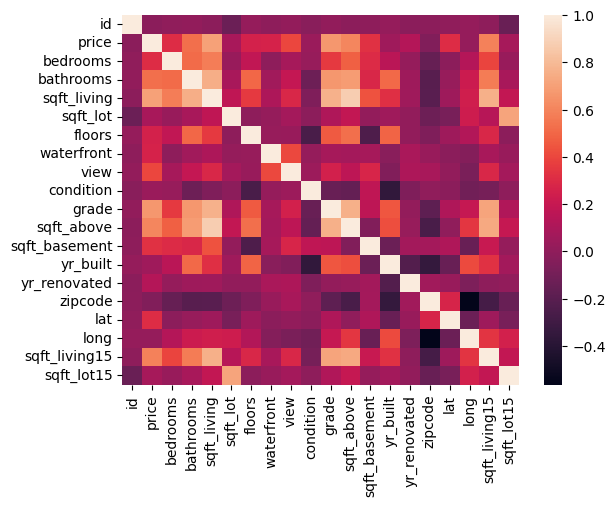

In [8]:
numeric_df = df.drop(columns=['date'])  # Exclude the 'date' column
corr = numeric_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

Podemos ver la dispersión de cada variable por separado.

<Axes: >

<Figure size 640x480 with 0 Axes>

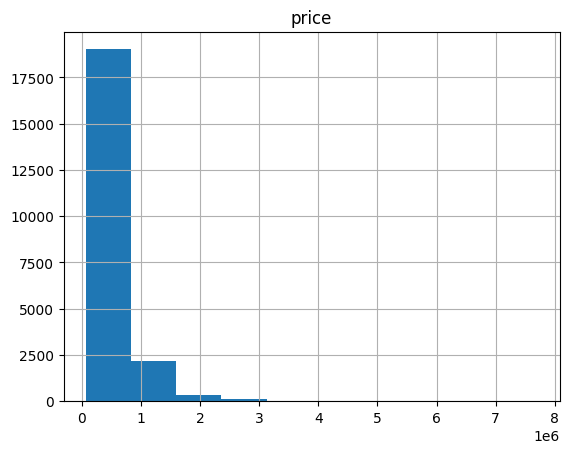

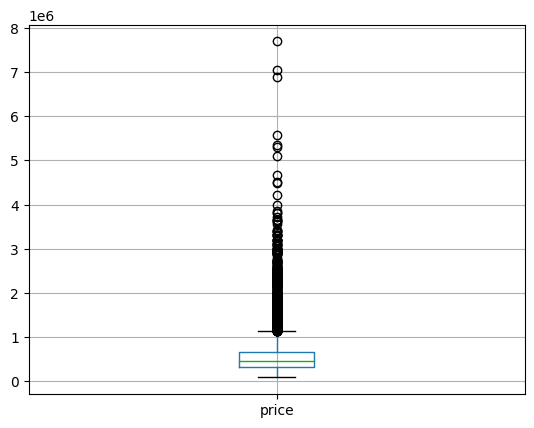

In [9]:
# elegimos una variable
var = 'price'
plt.figure()
df[[var]].hist()
plt.figure()
df.boxplot(column=[var])

Elegimos las variables de entrada y la variable de salida, vamos escalar los datos de entrada.

In [10]:
# Quitamos variables de entrada que no tiene importancia y la variable deseada
df2 = df.drop(['id','date','price'], axis=1)

# Graudamos el nombre de las variables para usarlo despues
columns = list(df2.columns)

# Casteamos a un arreglo de numpy
x = np.asanyarray(df2)

# Escalamos los datos de entrada
x = StandardScaler().fit_transform(x)
print('Tamaño de la entrada: ', x.shape)

# Seleccionamos la variable de salida
y = np.asanyarray(df[['price']])
print('Tamaño de la salida: ', y.shape)

Tamaño de la entrada:  (21613, 18)
Tamaño de la salida:  (21613, 1)


Creamos un modelo de regresión lineal y mostramos el entrenamiento.

In [11]:
model = LinearRegression()
model.fit(x, y)
print('R2-score: ', model.score(x, y))

R2-score:  0.6997471876839376


Por el momento no nos importa tanto el desempeño del modelo, lo que necesitamos es entender como afectan las variables de entrada a las salida deseada. Para este fin sacaremos los parametros de la regresión lineal.

                   coef
names                  
floors         0.004915
sqft_lot       0.007247
yr_renovated   0.010827
sqft_lot15     0.014214
sqft_living15  0.020218
condition      0.023361
sqft_basement  0.036743
long           0.041142
zipcode        0.042397
bathrooms      0.043112
bedrooms       0.045258
view           0.055123
waterfront     0.068620
sqft_above     0.103818
yr_built       0.104713
sqft_living    0.111311
lat            0.113630
grade          0.153352


Text(0.5, 1.0, 'Importance of variables over the price')

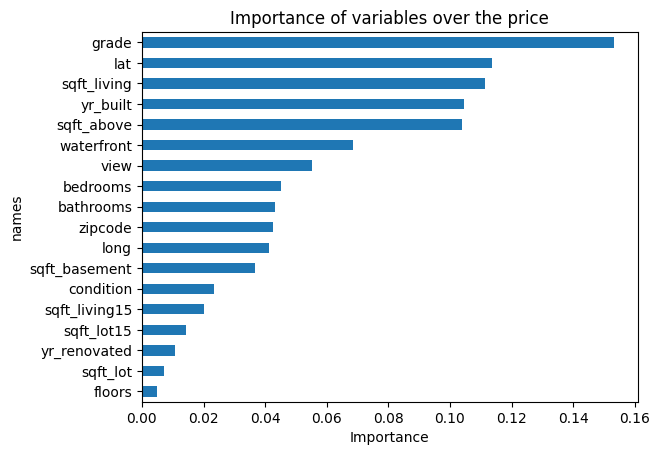

In [12]:
df3 = pd.DataFrame()
coef = np.abs((model.coef_.ravel()))
df3['coef'] = coef / np.sum(coef)
df3['names'] = columns
df3.sort_values(by=['coef'], ascending=True, inplace=True)
df3.set_index('names', inplace=True)
print(df3)

df3.coef.plot(kind='barh')
plt.xlabel('Importance')
plt.title('Importance of variables over the price')